# Descriptive analysis of oceanographic data
-----

This notebook provides a demonstration of how to read data and plot sections to
understand the temperature/salinity structure of ocean water.

You will have to install anaconda python to easily setup the required packages.
If you don't want to install the entire distribution, you can install miniconda
and install only those packages that you need.

You will need to install at least xarray, netCDF4 and [gsw](https://teos-10.github.io/GSW-Python/install.html)
along with the basic packages such as numpy/matplotlib etc., to get started.

In [1]:
import xarray
import gsw
import numpy as np
import matplotlib.pyplot as plt

Read in the data and see the coordinates and variables it contains. The description of this
data is available [here](https://icdc.cen.uni-hamburg.de/en/woce-climatology.html) and [here](ftp://ftp-icdc.cen.uni-hamburg.de/WOCE/climatology/observed_data/BSH35_report_final.pdf) (skim over it!)

In [2]:
data_list = []
for year in range(2010,2015):
    for month in range(1,13):
        if month<10:
            mon = '0'+str(month)
        else:
            mon = str(month)
        data = xarray.open_dataset('SEA_SURFACE_HEIGHT_mon_mean_{y}-{m}_ECCO_V4r4_latlon_0p50deg.nc'.format(y=year,m=mon))
        data_new = data.loc[dict(longitude=slice(34,42), latitude=slice(14,27))].SSH
        data_list.append(data_new[0])
data_arr=np.array(data_list);



        

In [3]:

for i in range(1,6):
    if i==1:
        yearly_summed_data = data_arr[12*(i-1):12*(i),:,:]
    else:
        yearly_summed_data = yearly_summed_data + data_arr[12*(i-1):12*(i),:,:]
        
yearly_avg_data = yearly_summed_data/5

print(np.min(data_arr),np.max(data_arr))
print(np.min(yearly_summed_data),np.max(yearly_summed_data))
print(np.min(yearly_avg_data),np.max(yearly_avg_data))
print(yearly_summed_data.shape)
print(yearly_avg_data.shape)
    
# data_arr.SSH.plot.contourf(levels=np.linspace(-2, 30, 20))

nan nan
nan nan
nan nan
(12, 26, 16)
(12, 26, 16)


In [4]:
data

<xarray.Dataset>
Dimensions:         (time: 1, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 2014-12-16T12:00:00
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] ...
    latitude_bnds   (latitude, nv) float32 ...
    longitude_bnds  (longitude, nv) float32 ...
Dimensions without coordinates: nv
Data variables:
    SSH             (time, latitude, longitude) float32 ...
    SSHIBC          (time, latitude, longitude) float32 ...
    SSHNOIBC        (time, latitude, longitude) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2015-01-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2014-12-01T00:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean 0.5 ...
    uuid:                         08a2fc68-4158-11eb-b498-0cc47a3f6943

In [5]:
yav_data = yearly_avg_data[0]

print(np.max((yearly_avg_data[7]==yearly_avg_data[11])*1))
print(yav_data.shape)



reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
lon_data_proc = np.concatenate((yav_data, reshaped_arr), axis=1)
lon_diff_data = np.diff(lon_data_proc, axis=1)
# print(lon_diff_data.shape)
# print(lon_diff_data.shape,'lon_diff')

lat_data_proc = np.concatenate((yav_data, yav_data[0,:].reshape(1,len(yav_data[0,:]))), axis=0)
lat_diff_data = np.diff(lat_data_proc, axis=0)

# print(np.max((lon_diff_data==lat_diff_data)*1))
# print(((lon_data_proc==lat_data_proc)))
# print(lat_diff_data.shape,'lat_diff')
print(lon_diff_data.shape)
print(lat_diff_data.shape)

0
(26, 16)
(26, 16)
(26, 16)


In [6]:
reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
lon_data_proc = np.concatenate((yav_data, yav_data[:,0].reshape(len(yav_data[:,0]),1)), axis=1)

lon_list= np.linspace(34, 42, 16)
lat_list = np.linspace(14, 27, 26);

omega = 7.2921*(10**-5)


g = 9.8


  #.reshape(1,len(lon_list)))


In [7]:
import numpy as np
import matplotlib.pyplot as plt

import math

X,Y = np.meshgrid(lat_list,lon_list);
conversion_factor=111209;

# lat_list = np.linspace(-89.75, 89.75, 360)
# lon_list = np.linspace(-179.75, 179.75, 720);

X,Y = np.meshgrid(lat_list,lon_list,indexing="ij");
Y1, X1 = np.meshgrid(lat_list,lon_list,indexing="ij");

Y_data = np.diff(Y, axis=1);
# print(Y_data.shape)
reshaped_arr = Y_data[:,14].reshape(len(Y_data[:,14]),1)
Y_data2 = np.concatenate((Y_data, reshaped_arr), axis=1)


f=2*omega*np.sin(np.deg2rad(lat_list))

dlat=conversion_factor*0.5
# print(Y)
for i in range (26):
    for j in range (16):
        Y_data2[i,j]=Y_data2[i,j]*conversion_factor*np.cos(np.deg2rad(X[i,j]))
    
lat_grad = (-g/f.reshape(len(f),1))*(lat_diff_data/dlat)   #.reshape(len(lat_list),1))
lon_grad = (-g/f.reshape(len(f),1))*(lon_diff_data/dlat) 
# print(lat_diff_data.shape)
# print(Y_data2.shape)
for i in range(26):
    for j in range(16):
        if(i==25 or j==15):
            lat_grad[i,j]=math.nan
            lon_grad[i,j]=math.nan


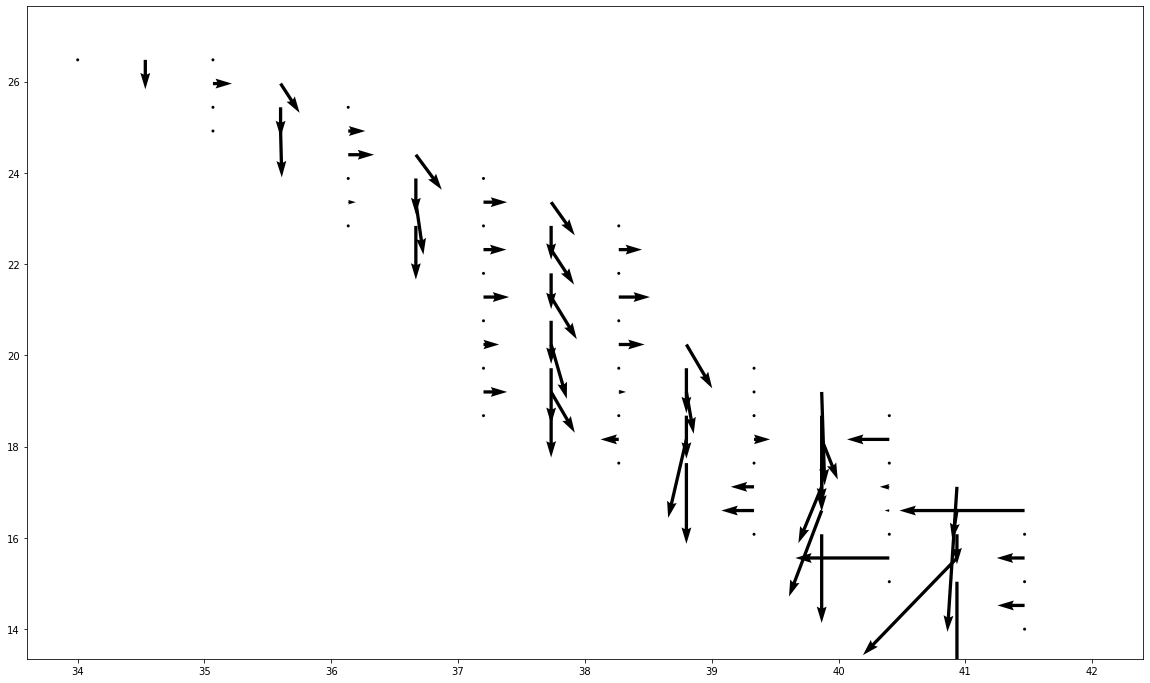

In [11]:
# import math
# for i in range (360):
#     for j in range (720):
#         if(i%2 or j%2 or i%3 or j%3):
#             lat_grad[i,j]=math.nan
#             lon_grad[i,j]=math.nan


            
            
# I wnat to slice the data also;

fig, ax = plt.subplots(figsize =(20, 12))
ax.quiver(lon_list, lat_list, lat_grad, lon_grad)

# print(Z_lat)
# print(Z_lon)
 
# ax.xaxis.set_ticks([])
# ax.yaxis.set_ticks([])



# show plot
plt.show()

In [15]:
x=data.SSH

In [16]:
%matplotlib notebook 
data.loc[dict(longitude=slice(-120.25, 120.75), latitude=slice(15.75, 50.75))].SSH.plot

Plot the temperature at different levels (by selecting the relevant vertical coordinate).

Here you will see the water temperature at 1000 meters below the surface. Can you interpret the 
patterns? The textbook (section 13.4) and the assigned book chapter should help!

In [17]:
%matplotlib notebook 
data.loc[dict(longitude=slice(-180, 180,10), latitude=slice(-90, 90,10))].SSH

<xarray.DataArray 'SSH' (time: 1, latitude: 36, longitude: 72)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-0.237056, -0.209587, ..., -0.256272, -0.242318],
        [-0.389399, -0.378672, ..., -0.407217, -0.3988  ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2014-12-16T12:00:00
  * latitude   (latitude) float32 -89.75 -84.75 -79.75 ... 75.25 80.25 85.25
  * longitude  (longitude) float32 -179.8 -174.8 -169.8 ... 165.2 170.2 175.2
Attributes:
    coverage_content_type:  modelResult
    long_name:              Dynamic sea surface height anomaly
    standard_name:          sea_surface_height_above_geoid
    units:                  m
    comment:                Dynamic sea surface height anomaly above the geoi...
    valid_min:              -1.8805772066116333
    valid_max:              1.4207719564437866

The following function is an illustration to calculate quantities of physical interest from
the available data. See the GSW documentation to find further functions that you might want to
use.

In [18]:
def get_density(salinity, temperature, pressure, longitude, latitude):
    
    SA = gsw.SA_from_SP(salinity, pressure, longitude, latitude)
    CT = gsw.CT_from_t(SA, temperature, pressure)
    
    return gsw.density.rho(SA, CT, pressure)

In [19]:
one,two = np.meshgrid(1:6,1:6);
U = 0.25*one;
V = 0.5*two;
quiver(one,two,U,V,0)

SyntaxError: invalid syntax (814457677.py, line 1)

Plot a vertical section in Temperature-Salinity space. Read about how to interpret this in the textbook and the assigned book chapter.

The colors are the density which helps us identify different water masses.

You can do the same for a region to see what water masses exists in a particular part of the
ocean. The below plot is for the North Atlantic.

<IPython.core.display.Javascript object>


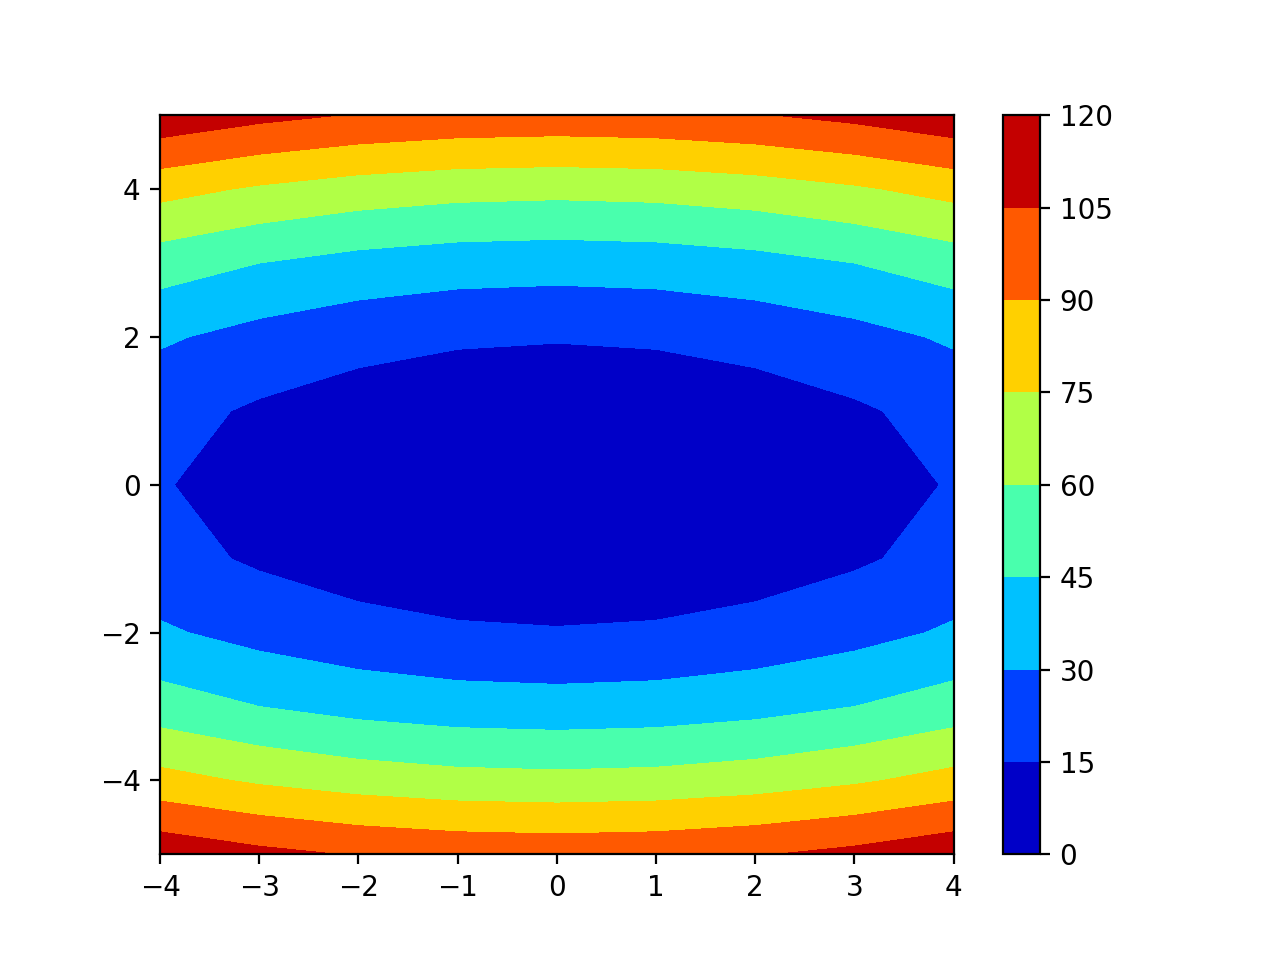

In [20]:
x = np.linspace(-4, 4, 9)
 
# numpy.linspace creates an array of
# 9 linearly placed elements between
# -4 and 4, both inclusive
y = np.linspace(-5, 5, 11)
 
# The meshgrid function returns
# two 2-dimensional arrays
x_1, y_1 = np.meshgrid(x, y)
 
ellipse = x_1 ** 2 + 4 * y_1**2
plt.contourf(x_1, y_1, ellipse, cmap = 'jet')
  
plt.colorbar()
plt.show()

Similarly, you can plot Neutral density surfaces in the ocean basins. It makes sense to take a mean
across some latitudes. We have ignored the first two hundred meters by slicing `ZAX` to those levels we are
interested in. A similar slicing along `LON` allows us to choose the Pacific Basin (see lat-lon plot of temperature to find approximate longitudinal extents of ocean basins)

<IPython.core.display.Javascript object>


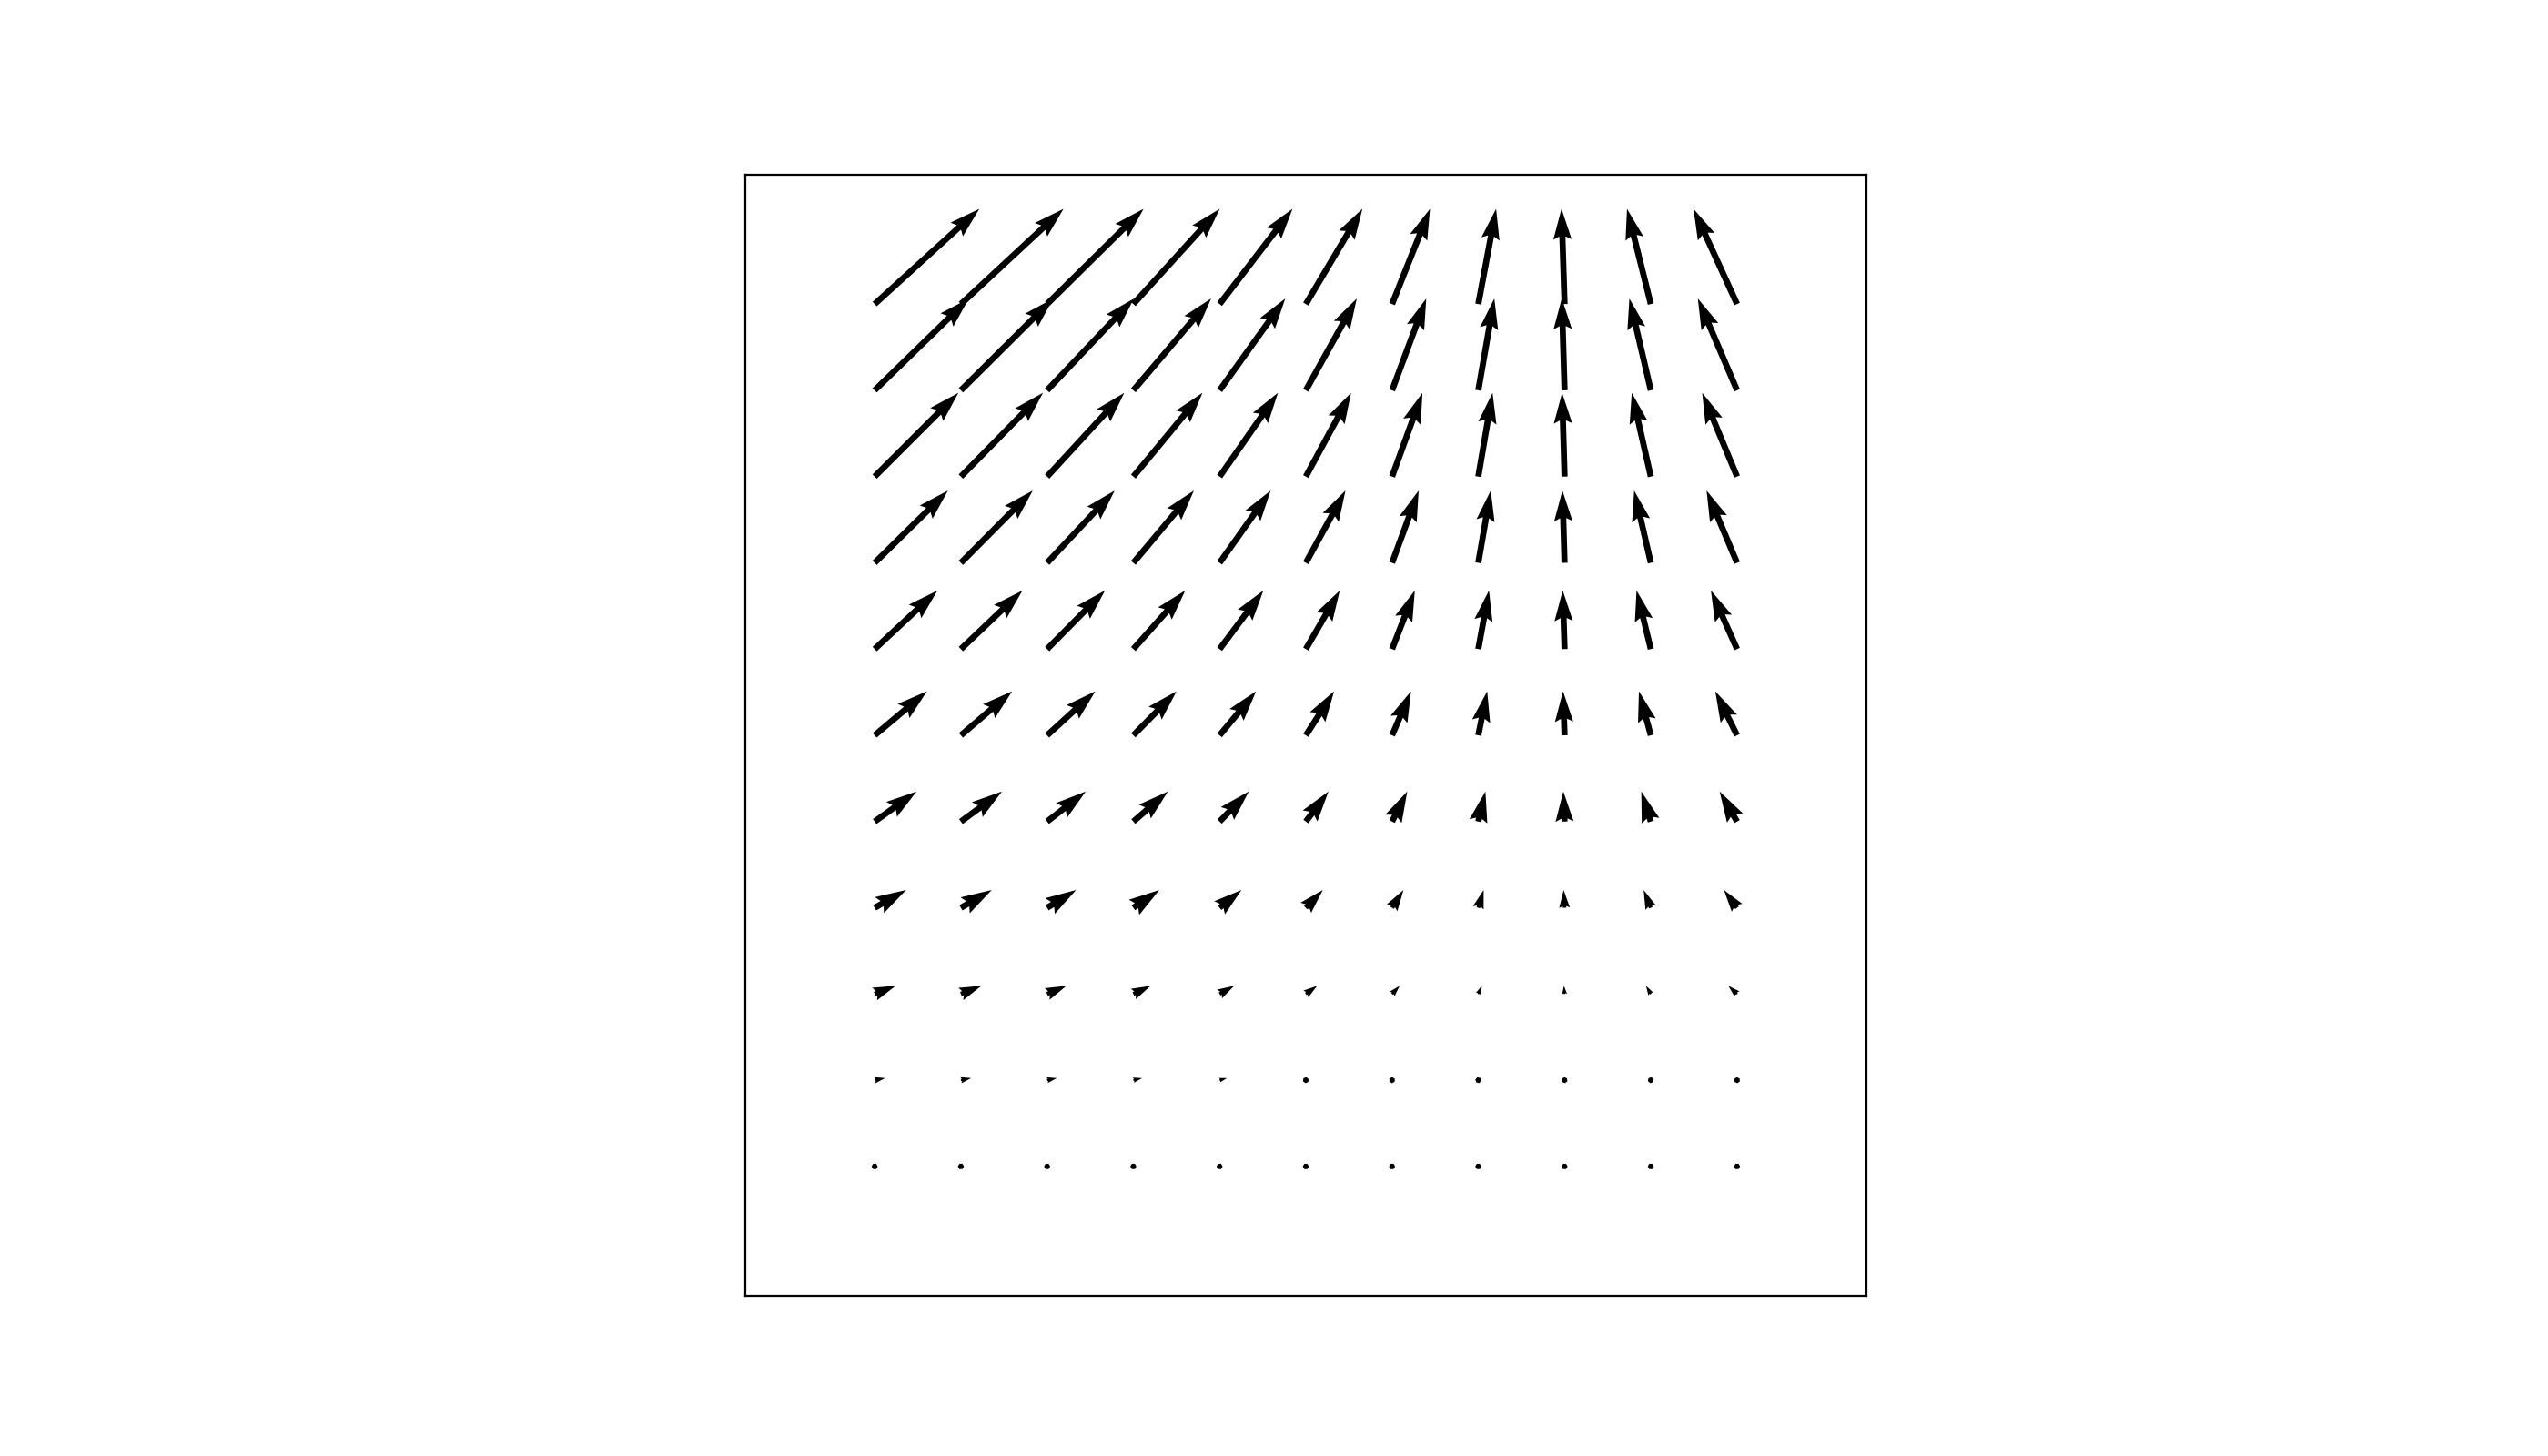

In [21]:
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating arrow
x = np.arange(0, 2.2, 0.2)
y = np.arange(0, 2.2, 0.2)
 
X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(Y)*Y
 
# creating plot
fig, ax = plt.subplots(figsize =(14, 8))
ax.quiver(X, Y, u, v)
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-0.3, 2.3, -0.3, 2.3])
ax.set_aspect('equal')
 
# show plot
plt.show()

You can do the same for any variable in the dataset. Here we plot potential temperature. Regions without colour usually represent continents or mid-ocean topography.